# The main goal of our experiments is to evaluate the proposed longitudinal LDP protocols on multidimensional frequency estimates a single time, i.e., satisfying $\epsilon_1$-LDP. 

## Number of evaluations (i.e., of different seeds)

In [20]:
nb_seed = 100

## Percentage for selecting lower bound, i.e., e1 = perc * eps_inf

For example, let $\epsilon_{\infty} = 2$ (infinity reports), one might want that the first $\epsilon_1$-LDP report to have high privacy such as $\epsilon_1=0.1$, i.e., $\epsilon_1=0.05\epsilon_{\infty}$. We will use this **percentage** notation to set up the privacy guarantees.

In [21]:
percentage = 0.6

## Functions to save results in csv format per method

In [22]:
def write_allomfree(values):
        with open('results/'+str(percentage)+'/vhs/final_results_allomfree.csv', mode='a', newline='') as scores_file:
            scores_writer = csv.writer(scores_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            scores_writer.writerow(values)
        scores_file.close()
        
def write_lsue_spl(values):
        with open('results/'+str(percentage)+'/vhs/final_results_lsue_spl.csv', mode='a', newline='') as scores_file:
            scores_writer = csv.writer(scores_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            scores_writer.writerow(values)
        scores_file.close()     
        
def write_loue_spl(values):
        with open('results/'+str(percentage)+'/vhs/final_results_loue_spl.csv', mode='a', newline='') as scores_file:
            scores_writer = csv.writer(scores_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            scores_writer.writerow(values)
        scores_file.close()         

def write_lsoue_spl(values):
        with open('results/'+str(percentage)+'/vhs/final_results_lsoue_spl.csv', mode='a', newline='') as scores_file:
            scores_writer = csv.writer(scores_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            scores_writer.writerow(values)
        scores_file.close()    
        
def write_losue_spl(values):
        with open('results/'+str(percentage)+'/vhs/final_results_losue_spl.csv', mode='a', newline='') as scores_file:
            scores_writer = csv.writer(scores_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            scores_writer.writerow(values)
        scores_file.close()           
        
def write_lsue_smp(values):
        with open('results/'+str(percentage)+'/vhs/final_results_lsue_smp.csv', mode='a', newline='') as scores_file:
            scores_writer = csv.writer(scores_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            scores_writer.writerow(values)
        scores_file.close()
        
def write_loue_smp(values):
        with open('results/'+str(percentage)+'/vhs/final_results_loue_smp.csv', mode='a', newline='') as scores_file:
            scores_writer = csv.writer(scores_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            scores_writer.writerow(values)
        scores_file.close()        
        
def write_lsoue_smp(values):
        with open('results/'+str(percentage)+'/vhs/final_results_lsoue_smp.csv', mode='a', newline='') as scores_file:
            scores_writer = csv.writer(scores_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            scores_writer.writerow(values)
        scores_file.close()    
        
def write_losue_smp(values):
        with open('results/'+str(percentage)+'/vhs/final_results_losue_smp.csv', mode='a', newline='') as scores_file:
            scores_writer = csv.writer(scores_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            scores_writer.writerow(values)
        scores_file.close()                         

## Finding parameters for each combination of L-UE protocols

In [23]:
def param_L_OUE(eps_perm, eps_inst): #State-of-the-art: OUE with memoization
    
    """Provides the flipping probabilities p1, q1, p2, q2 of using the L-OUE protocol.
    input: upper (eps_perm) and lower (eps_inst) bound of the privacy parameter epsilon.
    output: p1, q1, p2, q2"""
    
    # OUE parameters
    p1 = 0.5
    q1 = 1 / (np.exp(eps_perm) + 1)

    # OUE parameters
    p2 = 0.5
    var_q2 = sym.Symbol('q2')
    
    # solving for symbol q2
    num = (p1*p2 - var_q2*(p1-1)) * (-p2*q1 + var_q2*(q1-1)+1)
    den = (p2*q1 - var_q2*(q1-1)) * (-p1*p2 + var_q2*(p1-1)+1)

    q2 = float(min(sym.solve(sym.simplify(num/den-np.exp(eps_inst)))))
    
    # numerical evaluation
    num = (p1*p2 - q2*(p1-1)) * (-p2*q1 + q2*(q1-1)+1)
    den = (p2*q1 - q2*(q1-1)) * (-p1*p2 + q2*(p1-1)+1)

    if round(np.log(num/den),4) == eps_inst:
        if (np.array([p1, q1, p2, q2]) > 0).all():
            return p1, q1, p2, q2
        else: 
            raise ValueError('Probabilities are negative.')
    
def param_L_OSUE(eps_perm,eps_inst): #Our proposal: starting with OUE and then with SUE
    
    """Provides the flipping probabilities p1, q1, p2, q2 of using the L-OSUE protocol.
    input: upper (eps_perm) and lower (eps_inst) bound of the privacy parameter epsilon.
    output: p1, q1, p2, q2"""
    
    # OUE parameters
    p1 = 1/2
    q1 = 1/(np.exp(eps_perm) + 1)

    # SUE parameters
    p2 = (1 - np.exp(eps_inst + eps_perm)) / (np.exp(eps_inst) - np.exp(eps_perm) - np.exp(eps_inst + eps_perm) +1)
    q2 = 1 - p2
       
    # numerical evaluation
    num = (p1*p2 - q2*(p1-1)) * (-p2*q1 + q2*(q1-1)+1)
    den = (p2*q1 - q2*(q1-1)) * (-p1*p2 + q2*(p1-1)+1)

    if round(np.log(num/den), 4) == eps_inst:
        if (np.array([p1, q1, p2, q2]) > 0).all():
            return p1, q1, p2, q2
        else: 
            raise ValueError('Probabilities are negative.')

def param_L_SUE(eps_perm,eps_inst): #State-of-the-art: Basic-RAPPOR
    
    """Provides the flipping probabilities p1, q1, p2, q2 of using the L-SUE protocol.
    input: upper (eps_perm) and lower (eps_inst) bound of the privacy parameter epsilon.
    output: p1, q1, p2, q2"""
    
    # SUE parameters
    p1 = np.exp(eps_perm/2) / (np.exp(eps_perm/2) + 1)
    q1 = 1 - p1 #1 / (np.exp(eps_perm/2) + 1)
    
    # SUE parameters
    p2 = sym.Symbol('p2')
    q2 = 1 - p2

    # solving for symbol p2
    num = (p1*p2 - q2*(p1-1)) * (-p2*q1 + q2*(q1-1)+1)
    den = (p2*q1 - q2*(q1-1)) * (-p1*p2 + q2*(p1-1)+1)

    p2 = float(min(sym.solve(sym.simplify(num/den-np.exp(eps_inst)))))
    q2= 1- p2

    # numerical evaluation
    num = (p1*p2 - q2*(p1-1)) * (-p2*q1 + q2*(q1-1)+1)
    den = (p2*q1 - q2*(q1-1)) * (-p1*p2 + q2*(p1-1)+1)

    if round(np.log(num/den),4) == eps_inst:
        if (np.array([p1, q1, p2, q2]) > 0).all():
            return p1, q1, p2, q2
        else: 
            raise ValueError('Probabilities are negative.')

def param_L_SOUE(eps_perm, eps_inst): # Our proposal: starting with SUE and then with OUE
    
    """Provides the flipping probabilities p1, q1, p2, q2 of using the L-SOUE protocol.
    input: upper (eps_perm) and lower (eps_inst) bound of the privacy parameter epsilon.
    output: p1, q1, p2, q2"""
    
    # SUE parameters
    p1 = np.exp(eps_perm/2) / (np.exp(eps_perm/2) + 1)
    q1 = 1 - p1 # 1 / (np.exp(eps_perm/2) + 1)

    # OUE parameters
    p2 = 1/2
    q2 = sym.Symbol('q2')

    # solving for symbol q2
    num = (p1*p2 - q2*(p1-1)) * (-p2*q1 + q2*(q1-1)+1)
    den = (p2*q1 - q2*(q1-1)) * (-p1*p2 + q2*(p1-1)+1)

    q2 = float(min(sym.solve(sym.simplify(num/den-np.exp(eps_inst)))))

    # numerical evaluation
    num = (p1*p2 - q2*(p1-1)) * (-p2*q1 + q2*(q1-1)+1)
    den = (p2*q1 - q2*(q1-1)) * (-p1*p2 + q2*(p1-1)+1)

    if round(np.log(num/den),4) == eps_inst:
        if (np.array([p1, q1, p2, q2]) > 0).all():
            return p1, q1, p2, q2
        else: 
            print(p1, q1, p2, q2)
            raise ValueError('Probabilities are negative.')

## Finding parameters for L-GRR

In [24]:
def param_L_GRR(eps_perm, eps_inst, k):
    
    """Provides the flipping probabilities p1, q1, p2, q2 of using the L-GRR protocol.
    input: upper (eps_perm) and lower (eps_inst) bound of the privacy parameter epsilon.
    output: p1, q1, p2, q2"""
    
    # GRR parameters
    p1 = np.exp(eps_perm) / (np.exp(eps_perm) + k - 1)
    q1 = (1 - p1) / (k - 1)

    # GRR parameters
    num = q1 - np.exp(eps_inst) * p1
    den = (-p1 * np.exp(eps_inst)) + k*q1*np.exp(eps_inst) - q1*np.exp(eps_inst) - p1*(k-1)+q1

    p2 = num/den
    q2 = (1 - p2) / (k-1)

    num = p1 * p2 + q1 * q2
    den = p1 * q2 + q1 * p2

    if round(np.log(num/den), 4) == eps_inst:
        if (np.array([p1, q1, p2, q2]) >= 0).all():
            return p1, q1, p2, q2
        else: 
            raise ValueError('Probabilities are negative.')

## Numba library for speeding up things

In [25]:
from numba import jit

## GRR functions

In [26]:
@jit(nopython=True)
def GRR(x, lst_val, p, q):
    """
    GRR mechanism
    input: true value x, domain values 'lst_val', and probabilities p,q
    output: true value w.p. 'p', random value (except x) w.p. 'q'
    """
    
    rnd = np.random.random()

    if rnd <=p:    
        return x
    else:
        return np.random.choice(lst_val[lst_val !=x])

def SB_LGRR(p1, q1, p2, q2, lst_val, lst):
    """
    Estimation on the number/frequency of times each value has been reported.
    input: probabilities p1, q1, p2, and q2, domain values 'lst_val', and the list of reports 'lst'
    output: estimated frequency
    """
    
    n = len(lst)
    Ni = np.zeros(len(lst_val))

    for val in lst:  # how many times each value has been reported
        Ni[val] += 1
    
    est = ((Ni - n*q1*(p2-q2) - n*q2) / (n*(p1-q1)*(p2-q2))).clip(0) #estimated number with Eq. (9) clipped in 0 for re-normalization
        
    freq_est = est / sum(est) #re-normalized estimated frequency
    
    return freq_est

## UE functions

In [27]:
@jit(nopython=True)
def UE(arr, p, q):
    """
    UE mechanism
    input: encoded true value arr and probabilities p and q
    output: sanitized array 'rep'
    """
    
    size=len(arr)
    rep = np.zeros(size)
    
    for ind in range(size):
        if arr[ind] != 1:
            rnd = np.random.random()
            if rnd <= q:
                rep[ind] = 1       
        else:
            rnd = np.random.random()
            if rnd <= p:
                rep[ind] = 1
    return rep

def SB_UE(p1, q1, p2, q2, lst):
    """
    Estimation on the number/frequency of times each bit has been reported.
    input: probabilities p1, q1, p2, and q2, and the list of reports 'lst'
    output: estimated frequency
    """
    
    n = len(lst)
    
    Ni = sum(lst)
    
    est = ((Ni - n*q1*(p2-q2) - n*q2) / (n*(p1-q1)*(p2-q2))).clip(0) #estimated number with Eq. (9) clipped in 0 for re-normalization
    
    freq_est = est / sum(est) #re-normalized estimated frequency
    
    return freq_est

## Aproximate Variance

In [28]:
def var(p1, q1, p2, q2, n = 1):
    """
    Variance value of using memoization-based protocols, cf. Eq. (10)
    input: number of users n, and probabilities p1, q2, p2, and q2.
    output: variance value
    """
    
    f = 0 # approximate variance
    
    sig = q1*p2 + (1 - q1) * q2 + f*(((p1*p2) - p1*(1-p2)) + (q2*(1-p1) - (1-q2)*(1-p1)))
    
    return (sig * (1 - sig)) / (n * (p1 - q1)**2 * (p2 - q2)**2)

## Main libraries

In [29]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd; pd.set_option('mode.chained_assignment',None)
#pd.set_option('display.max_rows', 500)
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import copy
import sympy as sym
import datetime
import time
import csv
from pandas.core.common import flatten

## The dataset we use is from: https://github.com/hharcolezi/OpenMSFIMU

### Reading dataset

In [30]:
url = "https://raw.githubusercontent.com/hharcolezi/OpenMSFIMU/master/Data/Personal_table.csv"

df = pd.read_csv(url, error_bad_lines=False)
df.reset_index(inplace=True, drop=True)
df

,Person ID,Name,Gender,Age,Geolife,Visitor category,Region,Sleeping area
0,7645,Andrea Berry,NR,NR,NR,Foreign tourist,United Kingdom,City of Belfort
1,26771,Elizabeth Palmer,NR,NR,NR,Foreign tourist,Germany,NR
2,38302,Jacob Smith,NR,NR,NR,Foreign tourist,Netherlands,City of Belfort
3,28106,Francisco Blankenship,NR,NR,NR,Foreign tourist,United Kingdom,NR
4,72234,Stephanie Bell DDS,NR,NR,NR,Foreign tourist,United Kingdom,NR
...,...,...,...,...,...,...,...,...
88930,6998,Anastasie Begue,F,55-64,NR,French tourist,Rhône-Alpes,NR
88931,10589,Arthur Maillet5778,M,<18,rural worker,French tourist,Rhône-Alpes,Rest of Doubs
88932,10275,Arnaude du Leleu,F,>65,middle-class urban,French tourist,Rhône-Alpes,NR
88933,19080,Christiane Roy,F,55-64,middle-class urban,French tourist,Rhône-Alpes,City of Belfort


In [31]:
print('Dataset dimension:',df.shape)

Dataset dimension: (88935, 8)


In [32]:
print('Number of unique users:',len(set(df['Person ID'])))

Number of unique users: 88935


In [33]:
df.columns

Index(['Person ID', 'Name', 'Gender', 'Age', 'Geolife', 'Visitor category',
       'Region', 'Sleeping area'],
      dtype='object')

In [34]:
print("Domain size of each category we're interested in:\n")
for col in ['Visitor category','Gender', 'Age', 'Geolife', 'Region','Sleeping area']:
    print(col,':',len(set(df[col])))#,set(df[col])

Domain size of each category we're interested in:

Visitor category : 3
Gender : 3
Age : 8
Geolife : 12
Region : 37
Sleeping area : 11


## Dataset to work with

In [35]:
attributes = ['Visitor category','Gender', 'Age','Geolife', 'Region','Sleeping area']

df2anon = copy.deepcopy(df[attributes])

LE = LabelEncoder()

for col in attributes:
    df2anon[col] = LE.fit_transform(df[col])

df = pd.concat([df[['Person ID']],df2anon],axis=1)#,cp
df

,Person ID,Visitor category,Gender,Age,Geolife,Region,Sleeping area
0,7645,0,2,7,0,35,3
1,26771,0,2,7,0,15,4
2,38302,0,2,7,0,22,3
3,28106,0,2,7,0,35,4
4,72234,0,2,7,0,35,4
...,...,...,...,...,...,...,...
88930,6998,1,0,4,0,30,4
88931,10589,1,1,5,9,30,7
88932,10275,1,0,6,7,30,4
88933,19080,1,0,4,7,30,3


## Static parameters

In [36]:
#number of attributes (d)
d = len(attributes)
print('d=', d)

#number of users (n)
n = df.shape[0]
print('n=',n)

#range of epsilon used in experiments
lst_eps = np.arange(0.5, 4.1, 0.5)
print('epsilon=', list(lst_eps))

d= 6
n= 88935
epsilon= [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


## Real frequency

In [40]:
# For each attribute, count the number of people per value

dic_true = {att:{val:0 for val in np.unique(df[att])} for att in attributes}

for att in attributes:

    dfcp = df.groupby(att).count()
    n = df.shape[0]

    index = 0
    for val in dfcp.index:
        val_true = dfcp.values[index,0]
        dic_true[att][val] += val_true 
        index+=1
dic_true

{'Visitor category': {0: 1837, 1: 41655, 2: 45443},
 'Gender': {0: 45982, 1: 41116, 2: 1837},
 'Age': {0: 8474,
  1: 11115,
  2: 11813,
  3: 12710,
  4: 11907,
  5: 17111,
  6: 13968,
  7: 1837},
 'Geolife': {0: 13922,
  1: 9136,
  2: 1255,
  3: 4949,
  4: 8776,
  5: 11154,
  6: 5348,
  7: 14013,
  8: 8417,
  9: 8107,
  10: 236,
  11: 3622},
 'Region': {0: 45,
  1: 6290,
  2: 279,
  3: 52,
  4: 156,
  5: 702,
  6: 36,
  7: 1395,
  8: 231,
  9: 422,
  10: 642,
  11: 31,
  12: 230,
  13: 198,
  14: 63086,
  15: 424,
  16: 111,
  17: 1900,
  18: 57,
  19: 328,
  20: 1321,
  21: 210,
  22: 69,
  23: 316,
  24: 287,
  25: 160,
  26: 397,
  27: 504,
  28: 2505,
  29: 188,
  30: 5868,
  31: 46,
  32: 9,
  33: 52,
  34: 281,
  35: 74,
  36: 33},
 'Sleeping area': {0: 8771,
  1: 1394,
  2: 4880,
  3: 36612,
  4: 23342,
  5: 633,
  6: 4962,
  7: 2717,
  8: 2711,
  9: 2579,
  10: 334}}

## ALLOMFREE

In [42]:
starttime = time.time()

#run experiments 'nb_seed' times
for seed in range(nb_seed):
    print(seed)
    
    np.random.seed(seed)

    dic_allomfree = {} # initialize dictionary to save MSE result per epsilon

    for epsilon_tot in lst_eps: #iterate over each epsilon_inf value (upper bound - infinity repport)
        
        eps_inst = round(percentage * epsilon_tot, 4) #set the epsilon_1 value (lower bound - single repport)
        
        #==========================================================================================
        #L_OSUE parameters
        Rp1, Rq1, Rp2, Rq2 = param_L_OSUE(epsilon_tot, eps_inst)
        var_l_osue = var(Rp1, Rq1, Rp2, Rq2)
        #==========================================================================================
        #L-GRR parameters depends on the attribute size kj
        dic_param_grr = {val:[] for val in range(d)}
        lst_grr = [] 

        for idx in range(d):

            kj = np.unique(list(dic_true[attributes[idx]].keys())).shape[0] # take size of attribute domain

            p1, q1, p2, q2 = param_L_GRR(epsilon_tot, eps_inst, kj)

            dic_param_grr[idx] = p1, q1, p2, q2

            var_l_grr = var(p1,q1,p2,q2)

            if var_l_grr <= var_l_osue: #selecting the attributes that will use L-GRR as local randomizer
                lst_grr.append(idx)
        #==========================================================================================

        dff = df.sample(frac=1) # we'll shuffle the users' order in the dataset
        dff.reset_index(drop=True, inplace=True)

        # we'll partitionate the users indexes to separate in groups (i.e., to report a single attribute)
        lst_index = [list(_) for _ in np.array_split(dff.index, d)]

        lst_mse_att = [] # given epsilon, initialize a list to save MSE result per attribute

        for idx_att in range(d): # for each attribute

            att = attributes[idx_att]
            
            lst_val = np.unique(list(dic_true[att].keys())) # take domain values of the attribute

            kj = len(lst_val) # domain size of the attribute
            
            # select users that report the value of this attribute
            lst_true = list(dff.iloc[lst_index[idx_att]][att])
            
            if idx_att in lst_grr: # select L-GRR as local randomizer
                
                p1, q1, p2, q2 = dic_param_grr[idx_att]
                
                # list with epsilon_1-LDP values
                lst_lgrr = [GRR(GRR(val, lst_val, p1, q1), lst_val, p2, q2) for val in lst_true] #two rounds of sanitization
                
                #estimated frequency of values for this attribute
                est_allomfree = np.nan_to_num(SB_LGRR(p1, q1, p2, q2, lst_val, lst_lgrr))
            
            else: # select L-OSUE as local randomizer
                
                #Unary encoding
                lst_eye = np.eye(kj)
                lst_val = {val:0 for val in np.unique(df[att])}
                idx=0
                for key in lst_val.keys():
                    lst_val[key] = lst_eye[idx]
                    idx+=1
                
                # list with epsilon_1-LDP values
                lst_losue = [UE(UE(lst_val[val], Rp1, Rq1), Rp2, Rq2) for val in lst_true] #two rounds of sanitization
                
                #estimated frequency of values for this attribute
                est_allomfree = np.nan_to_num(SB_UE(Rp1, Rq1, Rp2, Rq2, lst_losue)) #ensure non-nan values
            
            #real frequency of values for this attribute
            real = np.array(list(dic_true[att].values()))
            real = real / sum(real)
            
            #save MSE for this attribute
            lst_mse_att.append(mean_squared_error(real, est_allomfree))
        
        #for each epsilon, we average the MSE by the number of attributes d (cf. Eq. (17) in the paper)
        dic_allomfree[epsilon_tot] = np.mean(lst_mse_att)

    #write results in csv format as: seed, MSE_eps1, MSE_eps2, ..., MSE_eps8
    write_allomfree(list(flatten([seed, list(dic_allomfree.values())])))
    
print('That took {} seconds'.format(time.time() - starttime))    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
That took 196.35017609596252 seconds


## L-OSUE

In [43]:
starttime = time.time()

#run experiments 'nb_seed' times
for seed in range(nb_seed):
    np.random.seed(seed)
    print(seed)

    dic_losue_smp = {} # initialize dictionary to save MSE result per epsilon

    for epsilon_tot in lst_eps: #iterate over each epsilon_inf value (upper bound - infinity repport)
        
        eps_inst = round(percentage * epsilon_tot, 4) #set the epsilon_1 value (lower bound - single repport)
        
        #==========================================================================================
        #L_OSUE parameters
        Rp1, Rq1, Rp2, Rq2 = param_L_OSUE(epsilon_tot, eps_inst)
        #==========================================================================================

        dff = df.sample(frac=1) # we'll shuffle the users' order in the dataset
        dff.reset_index(drop=True, inplace=True)

        # we'll partitionate the users indexes to separate in groups (i.e., to report a single attribute)
        lst_index = [list(_) for _ in np.array_split(dff.index, d)]

        lst_mse_att = [] # given epsilon, initialize a list to save MSE result per attribute

        for index_att in range(d): # for each attribute

            att = attributes[index_att]

            lst_val = np.unique(list(dic_true[att].keys())) # take domain values of the attribute

            kj = len(lst_val) # domain size of the attribute
            
            # select users that report the value of this attribute
            lst_true = list(dff.iloc[lst_index[index_att]][att])

            #Unary encoding
            lst_eye = np.eye(kj)
            lst_val = {val:0 for val in np.unique(df[att])}
            idx=0
            for key in lst_val.keys():
                lst_val[key] = lst_eye[idx]
                idx+=1

            # list with epsilon_1-LDP values
            lst_losue = [UE(UE(lst_val[val], Rp1, Rq1), Rp2, Rq2) for val in lst_true] #two rounds of sanitization
            
            #estimated frequency of values for this attribute
            est_losue = np.nan_to_num(SB_UE(Rp1, Rq1, Rp2, Rq2, lst_losue))
            
            #real frequency of values for this attribute
            real = np.array(list(dic_true[att].values()))
            real = real / sum(real)
            
            #save MSE for this attribute
            lst_mse_att.append(mean_squared_error(real, est_losue))
            
        #for each epsilon, we average the MSE by the number of attributes d (cf. Eq. (17) in the paper)    
        dic_losue_smp[epsilon_tot] =  np.mean(lst_mse_att)
    
    #write results in csv format as: seed, MSE_eps1, MSE_eps2, ..., MSE_eps8
    write_losue_smp(list(flatten([seed, list(dic_losue_smp.values())])))

print('That took {} seconds'.format(time.time() - starttime))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
That took 261.0616579055786 seconds


## L-SOUE

In [44]:
starttime = time.time()

#run experiments 'nb_seed' times
for seed in range(nb_seed):
    np.random.seed(seed)
    print(seed)

    dic_lsoue_smp = {} # initialize dictionary to save MSE result per epsilon

    for epsilon_tot in lst_eps: #iterate over each epsilon_inf value (upper bound - infinity repport)
        
        eps_inst = round(percentage * epsilon_tot, 4) #set the epsilon_1 value (lower bound - single repport)
        
        #==========================================================================================
        #L_SOUE parameters
        Rp1, Rq1, Rp2, Rq2 = param_L_SOUE(epsilon_tot, eps_inst)
        #==========================================================================================

        dff = df.sample(frac=1) # we'll shuffle the users' order in the dataset
        dff.reset_index(drop=True, inplace=True)

        # we'll partitionate the users indexes to separate in groups (i.e., to report a single attribute)
        lst_index = [list(_) for _ in np.array_split(dff.index, d)]

        lst_mse_att = [] # given epsilon, initialize a list to save MSE result per attribute

        for index_att in range(d): # for each attribute

            att = attributes[index_att]

            lst_val = np.unique(list(dic_true[att].keys())) # take domain values of the attribute

            kj = len(lst_val) # domain size of the attribute
            
            # select users that report the value of this attribute
            lst_true = list(dff.iloc[lst_index[index_att]][att])

            #Unary encoding
            lst_eye = np.eye(kj)
            lst_val = {val:0 for val in np.unique(df[att])}
            idx=0
            for key in lst_val.keys():
                lst_val[key] = lst_eye[idx]
                idx+=1

            # list with epsilon_1-LDP values
            lst_lsoue = [UE(UE(lst_val[val], Rp1, Rq1), Rp2, Rq2) for val in lst_true] #two rounds of sanitization
            
            #estimated frequency of values for this attribute
            est_lsoue = np.nan_to_num(SB_UE(Rp1, Rq1, Rp2, Rq2, lst_lsoue))
            
            #real frequency of values for this attribute
            real = np.array(list(dic_true[att].values()))
            real = real / sum(real)
            
            #save MSE for this attribute
            lst_mse_att.append(mean_squared_error(real, est_lsoue))
            
        #for each epsilon, we average the MSE by the number of attributes d (cf. Eq. (17) in the paper)    
        dic_lsoue_smp[epsilon_tot] =  np.mean(lst_mse_att)
    
    #write results in csv format as: seed, MSE_eps1, MSE_eps2, ..., MSE_eps8
    write_lsoue_smp(list(flatten([seed, list(dic_lsoue_smp.values())])))

print('That took {} seconds'.format(time.time() - starttime))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
That took 462.11999797821045 seconds


## L-SUE

In [45]:
starttime = time.time()

#run experiments 'nb_seed' times
for seed in range(nb_seed):
    np.random.seed(seed)
    print(seed)

    dic_lsue_smp = {} # initialize dictionary to save MSE result per epsilon

    for epsilon_tot in lst_eps: #iterate over each epsilon_inf value (upper bound - infinity repport)
        
        eps_inst = round(percentage * epsilon_tot, 4) #set the epsilon_1 value (lower bound - single repport)
        
        #==========================================================================================
        #L_SUE parameters
        Rp1, Rq1, Rp2, Rq2 = param_L_SUE(epsilon_tot, eps_inst)
        #==========================================================================================

        dff = df.sample(frac=1) # we'll shuffle the users' order in the dataset
        dff.reset_index(drop=True, inplace=True)

        # we'll partitionate the users indexes to separate in groups (i.e., to report a single attribute)
        lst_index = [list(_) for _ in np.array_split(dff.index, d)]

        lst_mse_att = [] # given epsilon, initialize a list to save MSE result per attribute

        for index_att in range(d): # for each attribute

            att = attributes[index_att]

            lst_val = np.unique(list(dic_true[att].keys())) # take domain values of the attribute

            kj = len(lst_val) # domain size of the attribute
            
            # select users that report the value of this attribute
            lst_true = list(dff.iloc[lst_index[index_att]][att])

            #Unary encoding
            lst_eye = np.eye(kj)
            lst_val = {val:0 for val in np.unique(df[att])}
            idx=0
            for key in lst_val.keys():
                lst_val[key] = lst_eye[idx]
                idx+=1

            # list with epsilon_1-LDP values
            lst_lsue = [UE(UE(lst_val[val], Rp1, Rq1), Rp2, Rq2) for val in lst_true] #two rounds of sanitization
            
            #estimated frequency of values for this attribute
            est_lsue = np.nan_to_num(SB_UE(Rp1, Rq1, Rp2, Rq2, lst_lsue))
            
            #real frequency of values for this attribute
            real = np.array(list(dic_true[att].values()))
            real = real / sum(real)
            
            #save MSE for this attribute
            lst_mse_att.append(mean_squared_error(real, est_lsue))
            
        #for each epsilon, we average the MSE by the number of attributes d (cf. Eq. (17) in the paper)    
        dic_lsue_smp[epsilon_tot] =  np.mean(lst_mse_att)
    
    #write results in csv format as: seed, MSE_eps1, MSE_eps2, ..., MSE_eps8
    write_lsue_smp(list(flatten([seed, list(dic_lsue_smp.values())])))

print('That took {} seconds'.format(time.time() - starttime))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
That took 452.98270416259766 seconds


## L-OUE

In [46]:
starttime = time.time()

#run experiments 'nb_seed' times
for seed in range(nb_seed):
    np.random.seed(seed)
    print(seed)

    dic_loue_smp = {} # initialize dictionary to save MSE result per epsilon

    for epsilon_tot in lst_eps: #iterate over each epsilon_inf value (upper bound - infinity repport)
        
        eps_inst = round(percentage * epsilon_tot, 4) #set the epsilon_1 value (lower bound - single repport)
        
        #==========================================================================================
        #L_OUE parameters
        Rp1, Rq1, Rp2, Rq2 = param_L_OUE(epsilon_tot, eps_inst)
        #==========================================================================================

        dff = df.sample(frac=1) # we'll shuffle the users' order in the dataset
        dff.reset_index(drop=True, inplace=True)

        # we'll partitionate the users indexes to separate in groups (i.e., to report a single attribute)
        lst_index = [list(_) for _ in np.array_split(dff.index, d)]

        lst_mse_att = [] # given epsilon, initialize a list to save MSE result per attribute

        for index_att in range(d): # for each attribute

            att = attributes[index_att]

            lst_val = np.unique(list(dic_true[att].keys())) # take domain values of the attribute

            kj = len(lst_val) # domain size of the attribute
            
            # select users that report the value of this attribute
            lst_true = list(dff.iloc[lst_index[index_att]][att])

            #Unary encoding
            lst_eye = np.eye(kj)
            lst_val = {val:0 for val in np.unique(df[att])}
            idx=0
            for key in lst_val.keys():
                lst_val[key] = lst_eye[idx]
                idx+=1

            # list with epsilon_1-LDP values
            lst_loue = [UE(UE(lst_val[val], Rp1, Rq1), Rp2, Rq2) for val in lst_true] #two rounds of sanitization
            
            #estimated frequency of values for this attribute
            est_loue = np.nan_to_num(SB_UE(Rp1, Rq1, Rp2, Rq2, lst_loue))
            
            #real frequency of values for this attribute
            real = np.array(list(dic_true[att].values()))
            real = real / sum(real)
            
            #save MSE for this attribute
            lst_mse_att.append(mean_squared_error(real, est_loue))
            
        #for each epsilon, we average the MSE by the number of attributes d (cf. Eq. (17) in the paper)    
        dic_loue_smp[epsilon_tot] =  np.mean(lst_mse_att)
    
    #write results in csv format as: seed, MSE_eps1, MSE_eps2, ..., MSE_eps8
    write_loue_smp(list(flatten([seed, list(dic_loue_smp.values())])))

print('That took {} seconds'.format(time.time() - starttime))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
That took 443.0038981437683 seconds


## Results

In [47]:
import matplotlib
params = {'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14',
          'font.size':'14',
          'legend.fontsize':'medium',
          'lines.linewidth':'1.5',
          'font.weight':'normal',
          'lines.markersize':'8'
          }
matplotlib.rcParams.update(params)

In [48]:
vhs_allomfree = pd.read_csv('results/'+str(percentage)+'/vhs/final_results_allomfree.csv', header=None, index_col=0)
vhs_losue_smp = pd.read_csv('results/'+str(percentage)+'/vhs/final_results_losue_smp.csv', header=None, index_col=0)
vhs_lsoue_smp = pd.read_csv('results/'+str(percentage)+'/vhs/final_results_lsoue_smp.csv', header=None, index_col=0)
vhs_lsue_smp = pd.read_csv('results/'+str(percentage)+'/vhs/final_results_lsue_smp.csv', header=None, index_col=0)
vhs_loue_smp = pd.read_csv('results/'+str(percentage)+'/vhs/final_results_loue_smp.csv', header=None, index_col=0)
vhs_allomfree.shape, vhs_lsue_smp.shape, vhs_loue_smp.shape, vhs_losue_smp.shape, vhs_lsoue_smp.shape

((100, 8), (100, 8), (100, 8), (100, 8), (100, 8))

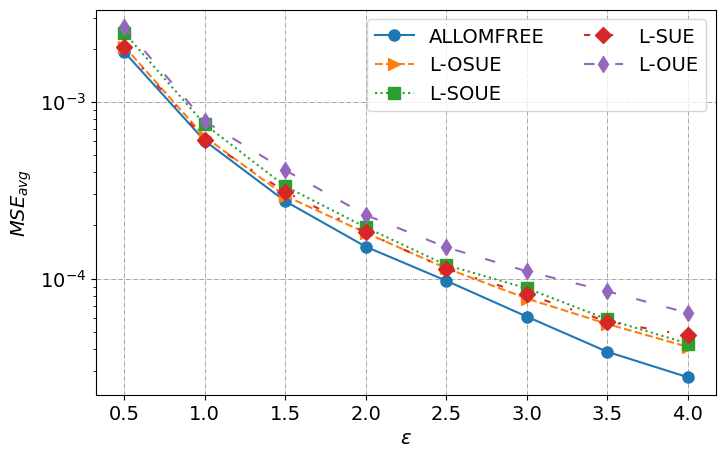

In [49]:
plt.figure(figsize=(8,5))
plt.grid(color='grey', linestyle='dashdot', linewidth=0.5)
plt.plot(vhs_allomfree.mean(), label='ALLOMFREE', marker='o')
plt.plot(vhs_losue_smp.mean(), label='L-OSUE',marker='>',linestyle='dashed')
plt.plot(vhs_lsoue_smp.mean(), label='L-SOUE',marker='s',linestyle='dotted')
plt.plot(vhs_lsue_smp.mean(), label='L-SUE', marker='D', linestyle=(0, (3, 10, 1, 10)))
plt.plot(vhs_loue_smp.mean(), label='L-OUE',marker='d',linestyle=(0, (5, 10)))

plt.yscale('log')
plt.xlabel('$\epsilon$')
plt.ylabel('$MSE_{avg}$')
plt.xticks(range(1,len(lst_eps)+1), lst_eps)
plt.legend(ncol=2);
plt.show()